### Market Management System - Data Analysis

In [27]:
# Importing required libraries and modules 
import pandas as pd 
import matplotlib.pyplot as plt 
import json

#### Data Presentation

In [28]:
# Data Importation 
custumer_data = pd.read_csv("../DataBase/custumerDB.csv") 
sales_data = pd.read_csv("../DataBase/salesDB.csv") 
feedback_data = pd.read_csv("../DataBase/feedbackDB.csv")
merge = pd.merge(custumer_data, feedback_data, on="CUSTUMER-ID", how="left")

display(merge.head(5))
display(sales_data.head(10))

,CUSTUMER-ID,CUSTUMER-NAME,CUSTUMER-AGE,CUSTUMER-GENDER,RATINGS,FEEDBACK
0,C3482828,TANISHK,15,M,9.0,NaN
1,C3098888,HARRY,32,M,8.0,NaN
2,C3309053,MARY,28,F,10.0,NaN
3,C4657327,JAMES,18,M,8.0,NaN
4,C8609978,ELLYSE,15,F,8.0,NaN


,ORDER-ID,CUSTUMER-ID,PRODUCT,CATEGORY,QUANTITY,PRICE,DISCOUNT,BILL,TIME
0,OR20260109115830,C3482828,TEA,GROCERY,2,40,5,76.00,2026-01-09 11:58:30
1,OR20260109115833,C3482828,COFFEE,GROCERY,2,60,5,114.00,2026-01-09 11:58:33
2,OR20260109115837,C3482828,BREAD,BAKERY,4,35,0,140.00,2026-01-09 11:58:37
3,OR20260109115839,C3482828,BUNS,BAKERY,2,32,0,64.00,2026-01-09 11:58:39
4,OR20260109115841,C3482828,MILK,DAIRY,5,55,2,269.50,2026-01-09 11:58:41
5,OR20260109115847,C3482828,MINERAL WATER,BEVERAGES,5,20,0,100.00,2026-01-09 11:58:47
6,OR20260109115941,C3098888,RICE,GROCERY,10,60,3,582.00,2026-01-09 11:59:41
7,OR20260109115945,C3098888,WHEAT FLOUR,GROCERY,5,55,3,266.75,2026-01-09 11:59:45
8,OR20260109115951,C3098888,INSTANT NOODLES,SNACKS,4,20,5,76.00,2026-01-09 11:59:51
9,OR20260109120018,C3309053,NAMKEEN,SNACKS,10,60,4,576.00,2026-01-09 12:00:18


#### Financial Performance and Inventory Health

,
INVESTMENT (₹),157142.00
CURRENT REVENUE (₹),67066.63
PROFIT (₹),11931.63
PROFIT MARGIN (%),21.64
TOTAL STOCKS,3374.00
UNSOLD STOCKS,2124.00
SOLD STOCKS,1250.00


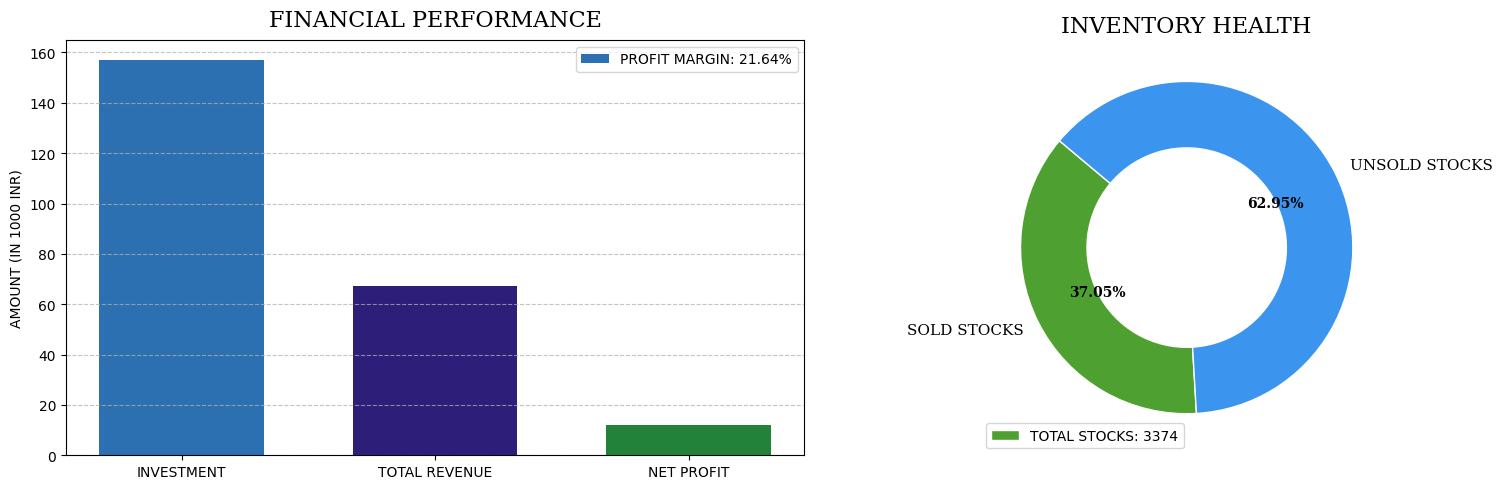

In [29]:
def loadData(filepath: str) -> dict:
    """Allows the system load data from the inventory"""
    try : 
        with open(filepath, 'r') as file :
            return json.load(file)
    except FileNotFoundError:
        return {}

inventory = loadData("../src/inventory.json")
del inventory["*"]

"""Segment that allowes the management analyse money and stock management"""
unsold_inv_values = 0
unsold_stocks = 0

for item in inventory.items():
    unsold_stocks += item[1]["STOCKS"]
    unsold_inv_values += item[1]["COST"] * item[1]["STOCKS"]

COGS = 0
sold_stocks = sum(sales_data["QUANTITY"])

for i, j in zip(sales_data["PRODUCT"], sales_data["QUANTITY"]):
    COGS += inventory[i]["COST"] * j

investment = unsold_inv_values + COGS
stocks = unsold_stocks + sold_stocks

total_revenue = sum(sales_data["BILL"])
net_profit = total_revenue - COGS
net_profit_margin = (net_profit/COGS) * 100

df = pd.DataFrame({"INVESTMENT (₹)" : [round(investment, 2)],
                        "CURRENT REVENUE (₹)": [round(total_revenue, 2)],
                        "PROFIT (₹)": [round(net_profit, 2)],
                        "PROFIT MARGIN (%)":[round(net_profit_margin, 2)],
                        "TOTAL STOCKS": [stocks],
                        "UNSOLD STOCKS" : [unsold_stocks],
                        "SOLD STOCKS" : [sold_stocks]}, index=['']).T

display(df) 

"""Graphical Representation"""
X1 = ['INVESTMENT', 'TOTAL REVENUE', 'NET PROFIT']
Y1 = [investment/1000, total_revenue/1000, net_profit/1000]
X2 = ['SOLD STOCKS', 'UNSOLD STOCKS']
Y2 = [sold_stocks, unsold_stocks]

fig, ax = plt.subplots(1, 2, figsize=(16, 5))

"""Financial Performance"""
ax[0].bar(X1, Y1, width=0.65, color=["#1862ABE8", "#18086CE9", "#0D7626E9"])
ax[0].set_title("FINANCIAL PERFORMANCE", family='serif', fontsize=16, pad=10)
ax[0].set_ylabel("AMOUNT (IN 1000 INR)")
ax[0].grid(axis='y', linestyle='--', alpha=0.75)
ax[0].legend([f'PROFIT MARGIN: {net_profit_margin:.2f}%'], loc='upper right')

"""Inventory Health"""
wedges, texts, autotexts = ax[1].pie(
    Y2, 
    labels=X2, 
    autopct='%1.2f%%', 
    startangle=140,
    colors=["#4EA130", "#3B95EF"], 
    wedgeprops={'width':0.4, 'edgecolor':'white'}
)

for autotext in autotexts:
    autotext.set_fontfamily('serif')
    autotext.set_color('black')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

for text in texts:
    text.set_color('black')
    text.set_fontsize(11)
    text.set_fontfamily('serif')

ax[1].set_title("INVENTORY HEALTH", family='serif', fontsize=16)
ax[1].legend([f'TOTAL STOCKS: {stocks}'],loc='lower left')

plt.subplots_adjust(top=0.8, left=0.2)
plt.tight_layout()
plt.show()

#### Custumer Influence

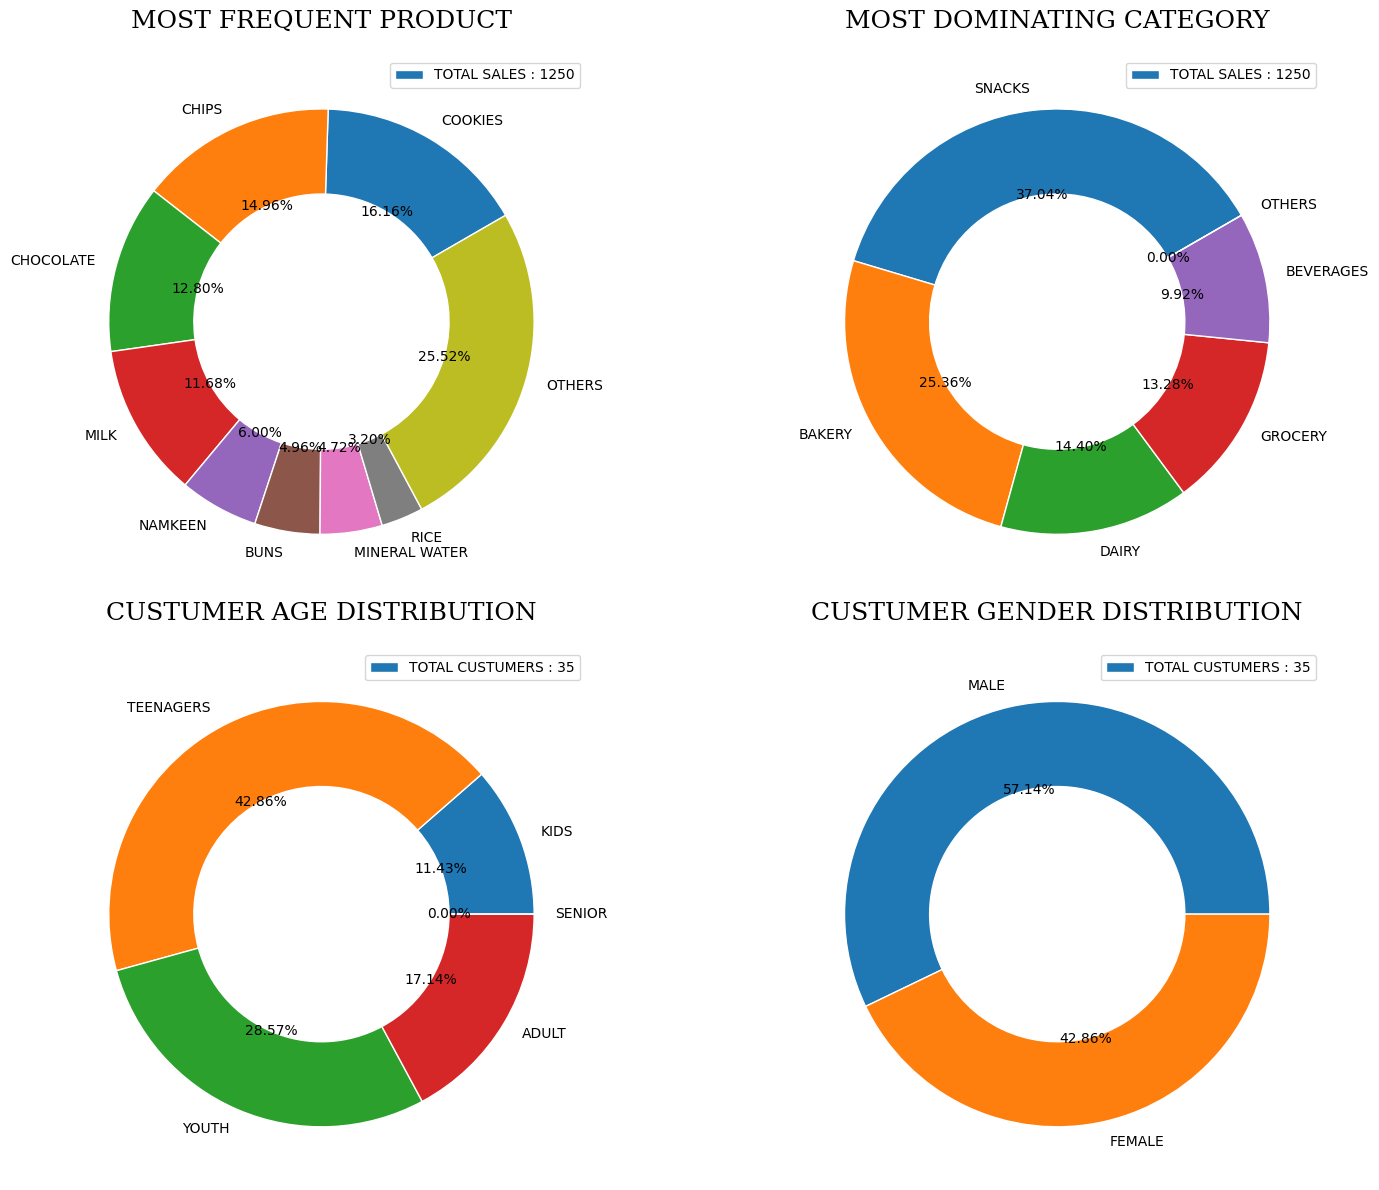

In [30]:
"""Most frequent product"""
f = {}
for item, qty in zip(sales_data["PRODUCT"], sales_data["QUANTITY"]):
    if item in f:
        f[item] += qty
    else:
        f[item] = qty

sort_f = sorted(f.items(), key=lambda x: x[1], reverse = True)

f1 = {}
for i in range(8):
    f1[sort_f[i][0]] = sort_f[i][1]

X1 = (list(f1.keys()))
Y1 = (list(f1.values()))

total_sales = sum(sales_data["QUANTITY"])

X1.append("OTHERS")
Y1.append(total_sales - sum(Y1))

"""Most dominating category"""
p = {}
for item, qty in zip(sales_data["CATEGORY"], sales_data["QUANTITY"]):
    if item in p:
        p[item] += qty
    else:
        p[item] = qty

sort_p = sorted(p.items(), key=lambda x: x[1], reverse=True)
f2 = {}
for j in range(5):
    f2[sort_p[j][0]] = sort_p[j][1]

X2 = list(f2.keys())
Y2 = list(f2.values())

X2.append('OTHERS')
Y2.append(total_sales - sum(Y2))

"""Age wise custumer distribution"""
f3 = {'KIDS' : 0, 'TEENAGERS' : 0, "YOUTH" : 0, 'ADULT': 0, 'SENIOR' : 0}
total_custumers = 0

for age in custumer_data["CUSTUMER-AGE"]:
    if age < 13 :
        f3["KIDS"] += 1
    elif age < 20 :
        f3["TEENAGERS"] += 1
    elif age < 30 :
        f3["YOUTH"] += 1
    elif age < 60 :
        f3["ADULT"] += 1
    else :
        f3["SENIOR"] += 1

    total_custumers += 1

X3 = list(f3.keys())
Y3 = list(f3.values())

"""Gender wise custumer distribution"""
f4 = {"MALE" : 0, "FEMALE": 0}

for gender in custumer_data["CUSTUMER-GENDER"]:
    if gender == "M":
        f4["MALE"] += 1
    else:
        f4["FEMALE"] += 1

X4 = list(f4.keys())
Y4 = list(f4.values())

"""Graphical Representation"""
fig, ax = plt.subplots(2, 2, figsize=(16,12))

"""Most frequent product"""
ax[0, 0].pie(Y1, 
        labels=X1, 
        autopct='%1.2f%%', 
        startangle=30,
        wedgeprops={'width':0.4, 'edgecolor':'white'})
ax[0, 0].set_title("MOST FREQUENT PRODUCT", family='serif', fontsize=18, pad=20)
ax[0, 0].legend([f"TOTAL SALES : {total_sales}"], loc='upper right')

"""Most dominating category"""
ax[0, 1].pie(Y2, 
        labels=X2, 
        autopct='%1.2f%%', 
        startangle=30,
        wedgeprops={'width':0.4, 'edgecolor':'white'})
ax[0, 1].set_title("MOST DOMINATING CATEGORY", family='serif', fontsize=18, pad=20)
ax[0, 1].legend([f"TOTAL SALES : {total_sales}"], loc='upper right')

"""Custumer Age Distribution"""
ax[1, 0].pie(Y3, 
        labels=X3, 
        autopct='%1.2f%%', 
        startangle=0,
        wedgeprops={'width':0.4, 'edgecolor':'white'})
ax[1, 0].set_title("CUSTUMER AGE DISTRIBUTION", family='serif', fontsize=18, pad=20)
ax[1, 0].legend([f"TOTAL CUSTUMERS : {total_custumers}"], loc='upper right')

"""Custumer Age Distribution"""
ax[1, 1].pie(Y4, 
        labels=X4, 
        autopct='%1.2f%%', 
        startangle=0,
        wedgeprops={'width':0.4, 'edgecolor':'white'})
ax[1, 1].set_title("CUSTUMER GENDER DISTRIBUTION", family='serif', fontsize=18, pad=20)
ax[1, 1].legend([f"TOTAL CUSTUMERS : {total_custumers}"], loc='upper right')

plt.grid()
plt.tight_layout()
plt.show()

#### Sales and Income Trend

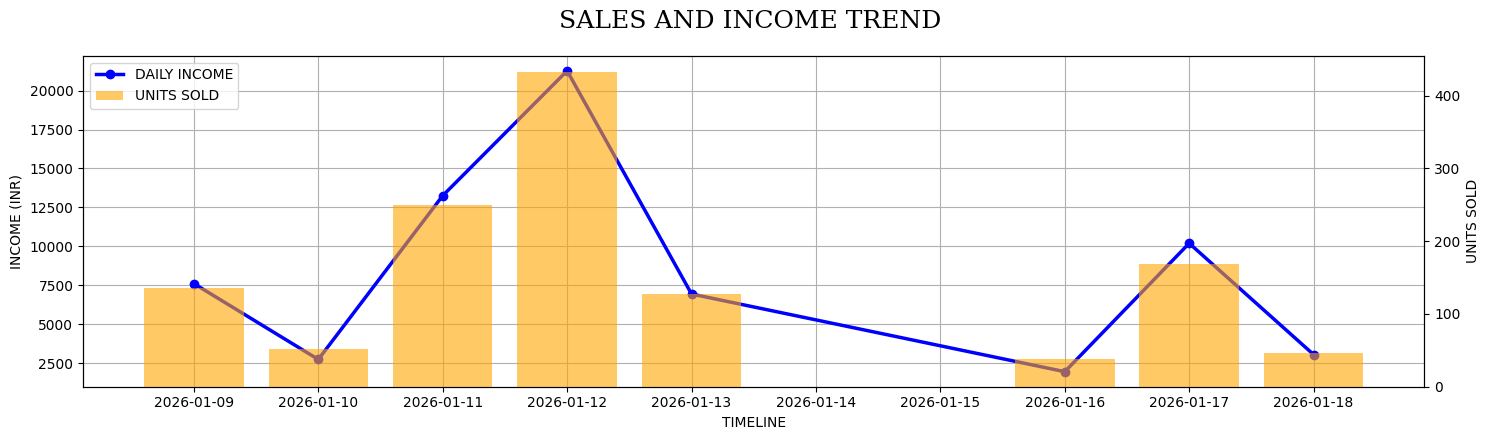

In [31]:
# Sales and Income Trend Analysis
sales_data["TIME"] = pd.to_datetime(sales_data["TIME"])
sales_data["DATE"] = sales_data["TIME"].dt.date

daily_sales = sales_data.groupby("DATE")["QUANTITY"].sum()
daily_income = sales_data.groupby("DATE")["BILL"].sum()

# Graphical Representation
fig, ax1 = plt.subplots(figsize=(15, 4.5))

ax1.plot(
    daily_income.index,
    daily_income.values,
    linewidth=2.5,
    marker="o",
    label="DAILY INCOME",
    color="blue"
)
ax1.set_ylabel("INCOME (INR)")
ax1.set_xlabel("TIMELINE")

ax2 = ax1.twinx()
ax2.bar(
    daily_sales.index,
    daily_sales.values,
    label="UNITS SOLD",
    color="orange",
    alpha=0.6
)
ax2.set_ylabel("UNITS SOLD")

plt.title("SALES AND INCOME TREND ", family="serif", fontsize=18, pad=20)

l1, lb1 = ax1.get_legend_handles_labels()
l2, lb2 = ax2.get_legend_handles_labels()

ax1.legend(
    l1 + l2,
    lb1 + lb2,
    loc="upper left"
)

ax1.grid(True)
plt.tight_layout()
plt.show()
